

# Project: Investigating IMDB (The Movie Database) Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Data Description**: Downloaded CSV File from TMDb, which was cleaned on <a href="https://www.google.com/url?q=https://www.kaggle.com/tmdb/tmdb-movie-metadata&sa=D&ust=1532469042115000">Kaggle</a>. This data set contains informationabout 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue. Certain columns, like ‘cast’and ‘genres’, contain multiplevalues separated by pipe (|)characters. The final two columns endingwith “_adj” show the budget andrevenue of the associated movie in terms of 2010 dollars,accounting for inflation overtime.

I am interested in looking what genres are most common in the movies and which ones are the most popular.

Step 1: Call Libraries: Pandas, Sklearn, MatPlotlib, Seaborn, and Numpy. 

In [106]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
from sklearn import linear_model 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Cleaning the data up**: Let's see what we are dealing with

### General Properties

In [107]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb_movies = pd.read_csv('tmdb-movies.csv')

Let's load the data and see the first 5 rows to have an idea of what the it looks like.

In [108]:
tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Looking at the Data, we have imdb id, some weight of popularity, some metadata, genres, vote count, and other things. I am going to be looking at genre and how it relates to popularity and votes. 

Now I am going to look at the end of the dataset to see if there is anything missing. 

If I am going to look at time, I am going to need to conver release_date into a proper year like release year. I don't want everything blocking together on the graph, so I am going to try to get release_date into a readable format. 

In [109]:
tmdb_movies.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


Ok, so popularity is going to be hard because it is relative to when the movie was released. Genre is still intact and vote average is still there. So I will prob looking at populatity.

Let's get the information of each column in the data to see if there is any null values in each column, how many are there should there be any, and also the type of the data in each column. This might influence how I clean up the data.

In [110]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Ok, so there looks like we have some null values (10866 total) The vote_average is the same, so no worry there. The genre seems to be missing a few values.  Now we will look at the datatype of each object. 

In [111]:
tmdb_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object



### Data Cleaning

>Now that we know what the data looks like, we need to complete several cleanup actions before we can analyse the data.

>1. Remove columns that are not needed such as the imdb_id, budget, revenue, cast, homepage, keywords, overview, production_companies, budget_adj, revenue_adj. 

>2. Drop duplicated rows (if there are any).
>3. Drop rows where the the vote count is 0

>4. Drop any rows that have no genre information.
>5. Change the release_date into datetime data type.

In [112]:
tmdb_movies.drop(['imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [113]:
tmdb_movies.drop_duplicates(inplace=True)

In [114]:
tmdb_movies.dropna(inplace=True, subset=['genres'])

In [115]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 6 columns):
id                10842 non-null int64
popularity        10842 non-null float64
original_title    10842 non-null object
genres            10842 non-null object
release_date      10842 non-null object
release_year      10842 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 592.9+ KB


In [116]:
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], format='%m/%d/%y')

Now I need to check if this converstion worked by comparing it to release year

In [117]:
(tmdb_movies['release_date'].dt.year == tmdb_movies['release_year']).all()

False

oh no! Ok, well let'see whats going on'

In [118]:
tmdb_movies.head()

,id,popularity,original_title,genres,release_date,release_year
0,135397,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,76341,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,262500,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,140607,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,168259,9.335014,Furious 7,Action|Crime|Thriller,2015-04-01,2015


In [119]:
tmdb_movies.tail()

,id,popularity,original_title,genres,release_date,release_year
10861,21,0.080598,The Endless Summer,Documentary,2066-06-15,1966
10862,20379,0.065543,Grand Prix,Action|Adventure|Drama,2066-12-21,1966
10863,39768,0.065141,Beregis Avtomobilya,Mystery|Comedy,2066-01-01,1966
10864,21449,0.064317,"What's Up, Tiger Lily?",Action|Comedy,2066-11-02,1966
10865,22293,0.035919,Manos: The Hands of Fate,Horror,2066-11-15,1966


ok, well it looks like it is adding a 20 instead of a 19 to some of the dates. We need to fix this problem

In [120]:
tmdb_movies['release_date']= pd.to_datetime({'year': tmdb_movies['release_year'], 'month': tmdb_movies['release_date'].dt.month, 'day': tmdb_movies['release_date'].dt.day})

Ok let's check if that worked'

In [121]:
tmdb_movies.tail()

,id,popularity,original_title,genres,release_date,release_year
10861,21,0.080598,The Endless Summer,Documentary,1966-06-15,1966
10862,20379,0.065543,Grand Prix,Action|Adventure|Drama,1966-12-21,1966
10863,39768,0.065141,Beregis Avtomobilya,Mystery|Comedy,1966-01-01,1966
10864,21449,0.064317,"What's Up, Tiger Lily?",Action|Comedy,1966-11-02,1966
10865,22293,0.035919,Manos: The Hands of Fate,Horror,1966-11-15,1966


In [122]:
tmdb_movies.head()

,id,popularity,original_title,genres,release_date,release_year
0,135397,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,76341,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,262500,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,140607,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,168259,9.335014,Furious 7,Action|Crime|Thriller,2015-04-01,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What are the most popular genres?

> **Drama**: It is clear that genre has the most releases over any other one.

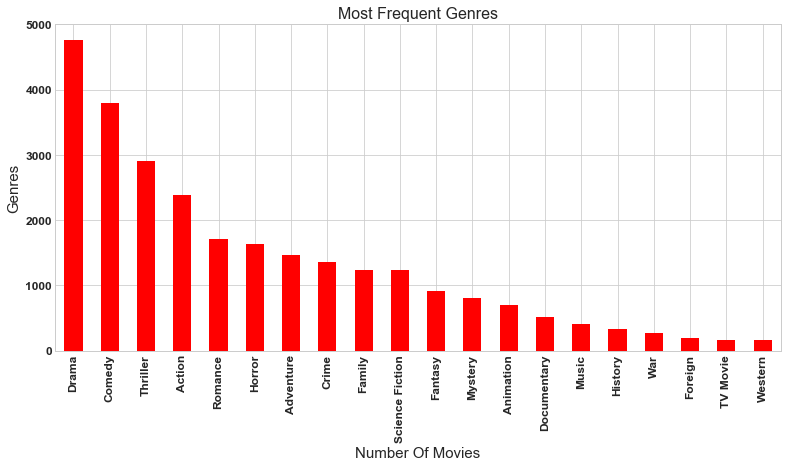

In [133]:
def count_genre(x):
    data_plot = tmdb_movies[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts()
    return info
total_genre_movies = count_genre('genres')
total_genre_movies.plot(kind= 'bar',figsize = (13,6),fontsize=12,colormap='flag')
plt.title("Most Frequent Genres",fontsize=16)
plt.xlabel('Number Of Movies',fontsize=15)
plt.ylabel("Genres",fontsize= 15)
sns.set_style("whitegrid")

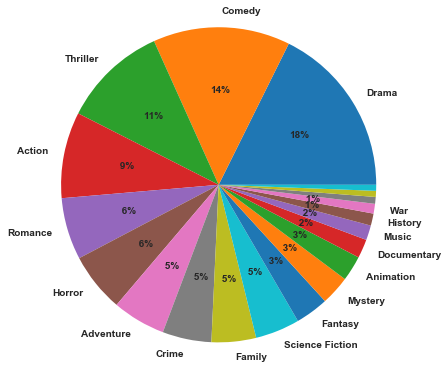

In [129]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

### Research Question 2: What are the most popular Genres each year?



The first thing we need to create a list of genres and create an array of years and popularity.

In [152]:
genre_details = list(map(str,(tmdb_movies['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']
year = np.array(tmdb_movies['release_year'])
popularity = np.array(tmdb_movies['popularity'])
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))
popularity_df = popularity_df.fillna(value = 0.0)

y = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[y]] = popularity_df.loc[split_genre, year[y]] + popularity[y]
    y+=1

We will need to calcualte the standard deviation next.

In [153]:
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.704728,1.288390,1.940326,1.353124,0.499612,1.075614,0.902690,1.766625,1.490012,1.048948,...,0.558652,0.468383,0.705157,0.928980,0.986229,0.535628,0.682942,0.706301,1.125633,1.565883
Science Fiction,-0.513374,-0.404987,-0.673835,-0.706935,-0.724680,-0.919747,0.040718,-0.678209,1.407358,-0.761441,...,-0.339028,-0.363516,0.028849,0.628508,-0.159483,0.159254,0.139531,0.525598,0.853330,1.183134
Fantasy,-0.574839,-0.785548,-0.725321,-0.958040,-0.066303,-1.043530,-0.648192,-0.750020,-0.112117,-0.822829,...,0.011932,0.269036,-0.045264,0.124077,0.099833,-0.025118,0.030488,-0.233586,-0.157087,-0.369104
Crime,-0.653850,-0.155568,-0.229694,-0.076707,0.029739,-0.573342,-0.091716,0.469737,0.154280,0.543705,...,0.033474,0.248672,0.245857,-0.453652,-0.226753,-0.114221,0.041799,0.297455,-0.268140,-0.021396
Western,0.657211,-0.630132,-0.303397,-0.925499,-1.068229,-0.577726,-0.085793,-0.819059,-0.887981,0.947916,...,-1.089095,-1.087609,-1.118055,-1.174932,-1.034729,-1.051631,-0.920882,-1.026702,-0.974592,-0.807853


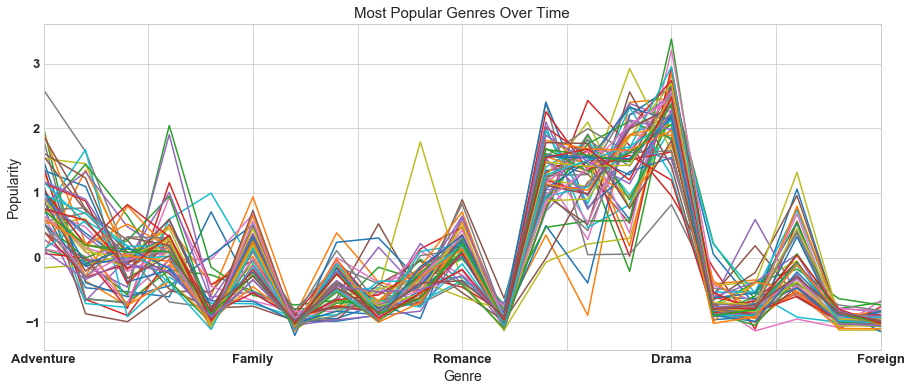

In [148]:
sns.set_style("whitegrid")
popular_genre.plot(figsize = (15,6),fontsize=13, legend=False)
plt.title("Most Popular Genres Over Time",fontsize=15)
plt.xlabel("Genre",fontsize=14)
plt.ylabel("Popularity",fontsize = 14)
sns.set_style("whitegrid")

That is a little hard to read. Let's try to split this up.

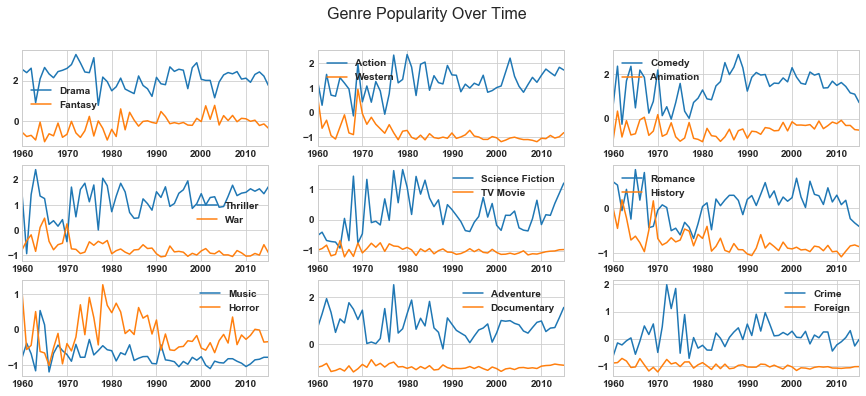

In [155]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(3,3,figsize = (15,6))
fig.suptitle('Genre Popularity Over Time',fontsize = 16)
popular_genre.loc['Drama'].plot(label = "Drama", ax = ax[0][0],legend=True)
popular_genre.loc['Action'].plot(label = "Action", ax = ax[0][1],legend=True)
popular_genre.loc['Comedy'].plot(label = "Comedy", ax = ax[0][2],legend=True)
popular_genre.loc['Thriller'].plot(label = "Thriller", ax = ax[1][0],legend=True)
popular_genre.loc['Science Fiction'].plot(label = "Science Fiction", ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance", ax = ax[1][2],legend=True)
popular_genre.loc['Music'].plot(label = "Music", ax = ax[2][0],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure", ax = ax[2][1],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime", ax = ax[2][2],legend=True)

popular_genre.loc['Fantasy'].plot(label = "Fantasy", ax = ax[0][0],legend=True)
popular_genre.loc['Western'].plot(label = "Western", ax = ax[0][1],legend=True)
popular_genre.loc['Animation'].plot(label = "Animation", ax = ax[0][2],legend=True)
popular_genre.loc['War'].plot(label = "War", ax = ax[1][0],legend=True)
popular_genre.loc['TV Movie'].plot(label = "TV Movie", ax = ax[1][1],legend=True)
popular_genre.loc['History'].plot(label = "History", ax = ax[1][2],legend=True)
popular_genre.loc['Horror'].plot(label = "Horror", ax = ax[2][0],legend=True)
popular_genre.loc['Documentary'].plot(label = "Documentary", ax = ax[2][1],legend=True)
popular_genre.loc['Foreign'].plot(label = "Foreign", ax = ax[2][2],legend=True)



<a id='conclusions'></a>
## Conclusions

Looking at Genre information is interesting, but can be flawed. Many times a movie will not be classified as mutliple genres, but will have those genres in it.  Action, Thriller, Comedy, and Drama dominate almost 50% of the movies made since 1960. And Drama and Action have stayed pretty consistently popular over the years. Horror took a huge jump in the late 70s and 80s, as well as Crime made a huge impact in the 70s. Besides a spike in the 60s, Drama has been steadily increasing over the years. While there are key genres that people prefer, the data is choppy, showing us that people's tastes change rapidly and the movie industry seems to be quick to adapt.





In [156]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate_a_dataset.ipynb'])

0